In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [3]:
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
food_waste = pd.read_csv("01_음식물쓰레기_FOOD_WASTE_210811_update.CSV", encoding="cp949")

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 전처리

## 데이터 살펴보기

In [5]:
print(food_waste.shape, long_term_frgn.shape, short_term_frgn.shape, resident_pop.shape, card_spending.shape)

NameError: name 'long_term_frgn' is not defined

In [9]:
food_waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


In [10]:
food_waste.describe()

,em_cnt,em_g,pay_amt
count,2.211445e+06,2.211445e+06,2.211445e+06
mean,2.124917e+01,4.800791e+04,1.436672e+03
std,2.713963e+01,5.928571e+04,2.756020e+03
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,1.295000e+04,3.850000e+02
50%,1.300000e+01,3.090000e+04,9.210000e+02
75%,2.700000e+01,6.215000e+04,1.854000e+03
max,1.580000e+03,2.520642e+06,1.396147e+06


In [7]:
korean.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주


In [8]:
long_term_frgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주


In [9]:
short_term_frgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078


In [27]:
resident_pop

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234
...,...,...,...,...,...,...,...,...,...
3607,2021,6,제주시,50110250,한림읍,여성,10341,1140,11481
3608,2021,6,제주시,50110600,화북동,남성,12062,169,12231
3609,2021,6,제주시,50110600,화북동,여성,12238,161,12399
3610,2021,6,서귀포시,50130550,효돈동,남성,2660,39,2699


In [28]:
card_spending

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715


## 다음

In [221]:
food_waste.groupby(['emd_nm']).mean().sort_values(by=['pay_amt'], axis=0, ascending=False).head(10)

,em_cnt,em_g,pay_amt
emd_nm,,,
중앙동,87.361038,357087.551711,10641.437006
천지동,32.374838,113290.285344,3367.757285
정방동,28.731960,101767.613151,3041.954313
서홍동,35.189884,87265.798174,2598.843622
알수없음,14.396237,86240.005131,2583.611745
동홍동,37.378313,84931.922141,2536.531275
삼도1동,34.594827,71825.706539,2145.990074
이도2동,32.663625,67017.517906,2007.613115
일도2동,33.424890,67137.233764,2006.103887


In [7]:
df = food_waste.copy()

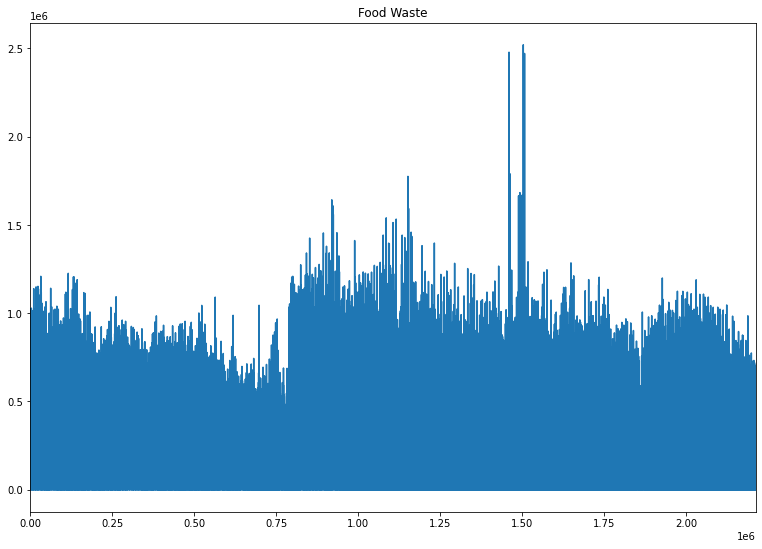

In [224]:
fw = df['em_g'].plot(title='Food Waste')
fig = fw.get_figure()
fig.set_size_inches(13,9)

In [225]:
print(df[(df['em_g'] < 0)])

Empty DataFrame
Columns: [base_date, city, emd_cd, emd_nm, em_area_cd, em_cnt, em_g, pay_amt]
Index: []


In [226]:
agg_df= df.groupby(['emd_nm','base_date'])['em_g'].mean().reset_index()
agg_df = agg_df.pivot_table(index=['base_date'], columns='emd_nm', values='em_g')
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 2018-01-01 to 2021-06-30
Data columns (total 42 columns):
건입동     1276 non-null float64
구좌읍     600 non-null float64
남원읍     1276 non-null float64
노형동     1277 non-null float64
대륜동     1276 non-null float64
대정읍     1276 non-null float64
대천동     1276 non-null float64
도두동     1277 non-null float64
동홍동     1276 non-null float64
봉개동     1277 non-null float64
삼도1동    1277 non-null float64
삼도2동    1277 non-null float64
삼양동     1277 non-null float64
서홍동     1276 non-null float64
성산읍     1276 non-null float64
송산동     1276 non-null float64
아라동     1277 non-null float64
안덕면     1276 non-null float64
알수없음    913 non-null float64
애월읍     1273 non-null float64
연동      1277 non-null float64
영천동     1276 non-null float64
예래동     1276 non-null float64
오라동     1277 non-null float64
외도동     1277 non-null float64
용담1동    1276 non-null float64
용담2동    1277 non-null float64
이도1동    1277 non-null float64
이도2동    1277 non-null float64
이호동     1272 no

In [227]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()

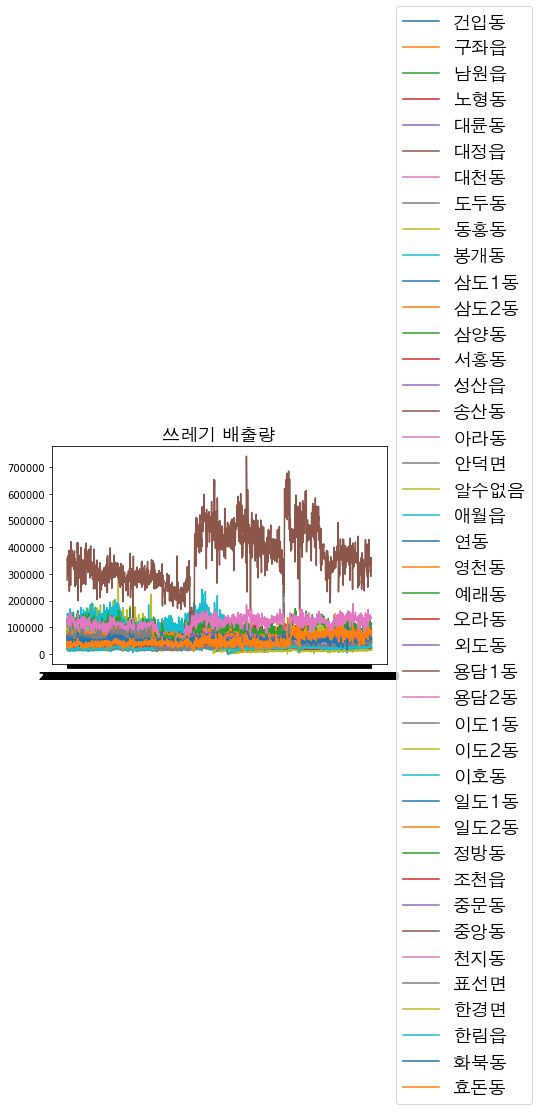

<Figure size 3600x3600 with 0 Axes>

In [228]:
plt.plot(agg_df)
plt.legend(agg_df.columns, loc='center left', bbox_to_anchor=(1,0.5),prop=fontprop)
plt.title('쓰레기 배출량',fontproperties=fontprop)
plt.figure(figsize=(50,50))
plt.show()

In [229]:
agg_df2= df.groupby(['emd_nm','base_date'])['em_g'].sum().reset_index()
agg_df2 = agg_df2.pivot_table(index=['base_date'], columns='emd_nm', values='em_g')
agg_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 2018-01-01 to 2021-06-30
Data columns (total 42 columns):
건입동     1276 non-null float64
구좌읍     600 non-null float64
남원읍     1276 non-null float64
노형동     1277 non-null float64
대륜동     1276 non-null float64
대정읍     1276 non-null float64
대천동     1276 non-null float64
도두동     1277 non-null float64
동홍동     1276 non-null float64
봉개동     1277 non-null float64
삼도1동    1277 non-null float64
삼도2동    1277 non-null float64
삼양동     1277 non-null float64
서홍동     1276 non-null float64
성산읍     1276 non-null float64
송산동     1276 non-null float64
아라동     1277 non-null float64
안덕면     1276 non-null float64
알수없음    913 non-null float64
애월읍     1273 non-null float64
연동      1277 non-null float64
영천동     1276 non-null float64
예래동     1276 non-null float64
오라동     1277 non-null float64
외도동     1277 non-null float64
용담1동    1276 non-null float64
용담2동    1277 non-null float64
이도1동    1277 non-null float64
이도2동    1277 non-null float64
이호동     1272 no

In [230]:
null = agg_df2.isnull().sum()
null

emd_nm
건입동       1
구좌읍     677
남원읍       1
노형동       0
대륜동       1
대정읍       1
대천동       1
도두동       0
동홍동       1
봉개동       0
삼도1동      0
삼도2동      0
삼양동       0
서홍동       1
성산읍       1
송산동       1
아라동       0
안덕면       1
알수없음    364
애월읍       4
연동        0
영천동       1
예래동       1
오라동       0
외도동       0
용담1동      1
용담2동      0
이도1동      0
이도2동      0
이호동       5
일도1동     13
일도2동      0
정방동       1
조천읍     672
중문동       1
중앙동       1
천지동       1
표선면       1
한경면     680
한림읍     678
화북동       0
효돈동       1
dtype: int64

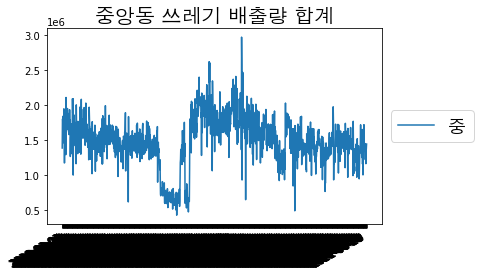

In [248]:
plt.plot(agg_df2['중앙동'])
plt.legend('중앙동', loc='center left', bbox_to_anchor=(1,0.5),prop=fontprop)
plt.title('중앙동 쓰레기 배출량 합계',fontproperties=fontprop,fontsize=20)
plt.gcf().autofmt_xdate()
plt.show()

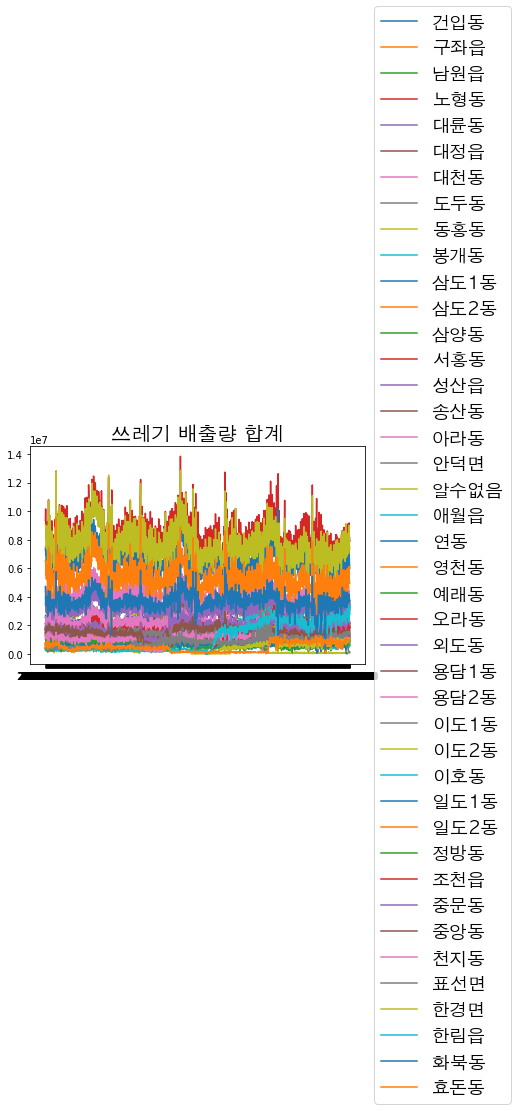

<Figure size 576x720 with 0 Axes>

In [232]:
plt.plot(agg_df2)
plt.legend(agg_df2.columns, loc='center left', bbox_to_anchor=(1,0.5),prop=fontprop)
plt.title('쓰레기 배출량 합계',fontproperties=fontprop,fontsize=20)
plt.figure(figsize=(8,10))
plt.show()

## 월 배출량으로 다운샘플링

In [5]:
food_waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


In [8]:
def month_resampling(df):
    new_data= pd.DataFrame()
    
    df['year_month']= df['base_date'].str.slice(stop=7)
    year_month = df['year_month'].drop_duplicates()
    downsampling_data = df.groupby(['emd_nm','year_month']).sum()
    downsampling_data = pd.DataFrame(downsampling_data)
    downsampling_data = downsampling_data.reset_index(drop=False, inplace=False)
    
    for i in tqdm(df.emd_nm.unique()):
        emd_nm = downsampling_data[downsampling_data['emd_nm']==i]
        start_time = min(emd_nm['year_month'])
        emd_nm = emd_nm.merge(year_month, how='outer')
        emd_nm = emd_nm.sort_values(by=['year_month'], axis=0, ascending=True)
        # emd_nm['em_g']= emd_nm[em_g].fillna(??) # 측정하기 전에 대한 채워넣기 정해야 됨
        emd_nm = emd_nm[emd_nm['year_month']>= start_time]
        
        new_data= pd.concat([new_data, emd_nm], axis=0)
        
    return new_data

In [9]:
resampling_data = month_resampling(df)
resampling_data['emd_nm']= resampling_data['emd_nm']
resampling_data

100%|██████████| 42/42 [00:00<00:00, 179.53it/s]


,emd_nm,year_month,em_cnt,em_g,pay_amt
0,외도동,2018-01,40581.0,95864700.0,2864007.0
1,외도동,2018-02,37306.0,88582050.0,2648170.0
2,외도동,2018-03,42208.0,97356250.0,2910160.0
3,외도동,2018-04,41487.0,88844750.0,2655016.0
4,외도동,2018-05,46513.0,94064300.0,2810329.0
...,...,...,...,...,...
15,한경면,2021-02,4975.0,17276700.0,517079.0
16,한경면,2021-03,5727.0,21007400.0,628842.0
17,한경면,2021-04,6147.0,22908150.0,685772.0
18,한경면,2021-05,7625.0,26927600.0,806001.0


In [236]:
resampling_data.isnull().sum()

emd_nm        10
year_month     0
em_cnt        10
em_g          10
pay_amt       10
dtype: int64

In [237]:
resampling_data[resampling_data['emd_nm'].isnull()]

,emd_nm,year_month,em_cnt,em_g,pay_amt
32,NaN,2019-02,NaN,NaN,NaN
33,NaN,2019-03,NaN,NaN,NaN
34,NaN,2019-04,NaN,NaN,NaN
35,NaN,2019-05,NaN,NaN,NaN
36,NaN,2019-06,NaN,NaN,NaN
37,NaN,2019-07,NaN,NaN,NaN
38,NaN,2019-08,NaN,NaN,NaN
39,NaN,2020-03,NaN,NaN,NaN
40,NaN,2020-04,NaN,NaN,NaN
41,NaN,2020-05,NaN,NaN,NaN


In [238]:
resampling_data[(resampling_data['year_month']=='2019-02')]

,emd_nm,year_month,em_cnt,em_g,pay_amt
13,외도동,2019-02,40796.0,93201100.0,2785911.0
13,아라동,2019-02,54591.0,125788600.0,3755337.0
13,노형동,2019-02,111835.0,251290500.0,7510492.0
13,도두동,2019-02,5621.0,14416750.0,431093.0
13,오라동,2019-02,24220.0,58486400.0,1724327.0
13,삼양동,2019-02,44277.0,100438200.0,2976771.0
13,이도2동,2019-02,97306.0,231621700.0,6920097.0
13,일도2동,2019-02,69010.0,164367100.0,4905669.0
13,건입동,2019-02,18910.0,46934900.0,1403269.0
13,화북동,2019-02,50778.0,108215250.0,3233761.0


In [1]:
resampling_data = resampling_data.dropna(axis=0)
resampling_data

NameError: name 'resampling_data' is not defined

## 주 단위로 다운샘플링..?

## 카드 

In [57]:
card_spending

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715


In [11]:
def month_resampling(df):
    new_data= pd.DataFrame()
    
    df['year_month']= df['base_date'].str.slice(stop=7)
    year_month = df['year_month'].drop_duplicates()
    downsampling_data = df.groupby(['emd_nm','year_month']).sum()
    downsampling_data = pd.DataFrame(downsampling_data)
    downsampling_data = downsampling_data.reset_index(drop=False, inplace=False)
    
    for i in tqdm(df.emd_nm.unique()):
        emd_nm = downsampling_data[downsampling_data['emd_nm']==i]
        start_time = min(emd_nm['year_month'])
        emd_nm = emd_nm.merge(year_month, how='outer')
        emd_nm = emd_nm.sort_values(by=['year_month'], axis=0, ascending=True)
        # emd_nm['em_g']= emd_nm[em_g].fillna(??) # 측정하기 전에 대한 채워넣기 정해야 됨
        emd_nm = emd_nm[emd_nm['year_month']>= start_time]
        
        new_data= pd.concat([new_data, emd_nm], axis=0)
        
    return new_data

In [12]:
rs_card = month_resampling(card_spending)
rs_card['emd_nm']= rs_card['emd_nm']
rs_card

100%|██████████| 44/44 [00:00<00:00, 180.64it/s]


,emd_nm,year_month,use_cnt,use_amt
0,연동,2018-01,299618,9549524632
1,연동,2018-02,263826,9050723296
2,연동,2018-03,316717,9657156769
3,연동,2018-04,313588,9784210849
4,연동,2018-05,334076,10492586347
...,...,...,...,...
37,알수없음,2021-02,4305,159696790
38,알수없음,2021-03,5049,186445683
39,알수없음,2021-04,4993,137582002
40,알수없음,2021-05,5225,165997264


In [86]:
resampling_data['year_month'].groupby(resampling_data['emd_nm']).size() # 구좌읍, 조천읍, 한경면, 한림읍 20개씩 / 알수없음 32개

emd_nm
건입동     42
구좌읍     20
남원읍     42
노형동     42
대륜동     42
대정읍     42
대천동     42
도두동     42
동홍동     42
봉개동     42
삼도1동    42
삼도2동    42
삼양동     42
서홍동     42
성산읍     42
송산동     42
아라동     42
안덕면     42
알수없음    32
애월읍     42
연동      42
영천동     42
예래동     42
오라동     42
외도동     42
용담1동    42
용담2동    42
이도1동    42
이도2동    42
이호동     42
일도1동    42
일도2동    42
정방동     42
조천읍     20
중문동     42
중앙동     42
천지동     42
표선면     42
한경면     20
한림읍     20
화북동     42
효돈동     42
Name: year_month, dtype: int64

In [87]:
rs_card['year_month'].groupby(rs_card['emd_nm']).size()

emd_nm
건입동     42
구좌읍     42
남원읍     42
노형동     42
대륜동     42
대정읍     42
대천동     42
도두동     42
동홍동     42
봉개동     42
삼도1동    42
삼도2동    42
삼양동     42
서홍동     42
성산읍     42
송산동     42
아라동     42
안덕면     42
알수없음    42
애월읍     42
연동      42
영천동     42
예래동     42
오라동     42
외도동     42
용담1동    42
용담2동    42
우도면     42
이도1동    42
이도2동    42
이호동     42
일도1동    42
일도2동    42
정방동     42
조천읍     42
중문동     42
중앙동     42
천지동     42
추자면     42
표선면     42
한경면     42
한림읍     42
화북동     42
효돈동     42
Name: year_month, dtype: int64

In [92]:
food_waste['emd_nm'].nunique()

42

In [88]:
resampling_data['emd_nm'].nunique()

42

In [90]:
rs_card['emd_nm'].nunique()

44

In [59]:
train = pd.merge(resampling_data, rs_card, how='left')

In [60]:
train

,emd_nm,year_month,em_cnt,em_g,pay_amt,use_cnt,use_amt
0,외도동,2018-01,40581.0,95864700.0,2864007.0,140824,4224320072
1,외도동,2018-02,37306.0,88582050.0,2648170.0,120571,3908097453
2,외도동,2018-03,42208.0,97356250.0,2910160.0,144502,4326760833
3,외도동,2018-04,41487.0,88844750.0,2655016.0,145213,4246794704
4,외도동,2018-05,46513.0,94064300.0,2810329.0,155162,4679206720
...,...,...,...,...,...,...,...
1661,한경면,2021-02,4975.0,17276700.0,517079.0,25155,935457708
1662,한경면,2021-03,5727.0,21007400.0,628842.0,28488,988991233
1663,한경면,2021-04,6147.0,22908150.0,685772.0,28994,1043313074
1664,한경면,2021-05,7625.0,26927600.0,806001.0,31362,1171964148


In [15]:
cor = train.corr()
cor

,em_cnt,em_g,pay_amt,use_cnt,use_amt
em_cnt,1.000000,0.982419,0.976868,0.957103,0.949860
em_g,0.982419,1.000000,0.995494,0.942355,0.942195
pay_amt,0.976868,0.995494,1.000000,0.937514,0.937293
use_cnt,0.957103,0.942355,0.937514,1.000000,0.997073
use_amt,0.949860,0.942195,0.937293,0.997073,1.000000


In [16]:
cor2 = train['em_g'].corr(train['use_amt'])
cor2

0.9421952366687528

## 거주인구

In [46]:
resident_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 9 columns):
base_year        3612 non-null int64
base_month       3612 non-null int64
city             3612 non-null object
emd_cd           3612 non-null int64
emd_nm           3612 non-null object
sex              3612 non-null object
resid_reg_pop    3612 non-null int64
foreign_pop      3612 non-null int64
total_pop        3612 non-null int64
dtypes: int64(6), object(3)
memory usage: 254.1+ KB


In [47]:
df2= resident_pop.copy()

In [30]:
df2['emd_cd'].nunique()

43

In [31]:
pivot = pd.pivot_table(df2, index=['base_year', 'base_month'], columns=['emd_nm'])['total_pop']
pivot

emd_nm                   건입동     구좌읍     남원읍      노형동     대륜동      대정읍  \
base_year base_month                                                     
2018      01          5014.0  8063.0  9870.0  27479.0  6825.5  11301.5   
          02          5019.0  8081.5  9888.5  27516.5  6849.5  11315.0   
          03          5002.5  8074.0  9903.0  27500.0  6925.5  11335.0   
          04          5008.5  8079.0  9918.0  27569.0  6935.0  11360.0   
          05          5019.0  8102.0  9945.0  27722.5  6960.0  11408.0   
          06          5015.5  8130.5  9965.0  27790.0  6978.5  11386.0   
          07          5016.5  8158.0  9945.0  27809.0  7019.0  11397.0   
          08          5010.0  8142.5  9938.5  27847.5  7029.0  11593.5   
          09          4996.0  8148.0  9937.0  27879.5  7050.5  11578.5   
          10          4976.5  8143.0  9915.5  28004.0  7063.5  11565.5   
          11          4953.0  8137.0  9911.0  28049.5  7074.0  11559.5   
          12          4928.5  8141.5  9889.0  28111.5  7078.0  11547.0   
2019      01          4880.0  8092.0  9896.5  28106.5  7176.5  11541.5   
          02          4856.5  8119.5  9891.0  28053.0  7240.0  11542.0   
          03          4855.5  8112.5  9898.5  28052.5  7270.0  11557.5   
          04          4858.5  8144.5  9928.0  28138.0  7278.0  11577.5   
          05          4836.5  8153.0  9948.0  28159.5  7287.0  11568.0   
          06          4838.0  8155.5  9957.5  28155.0  7276.0  11482.0   
          07          4834.0  8155.5  9949.0  28134.0  7284.5  11472.0   
          08          4820.0  8165.5  9954.0  28166.5  7280.0  11610.5   
          09          4821.5  8161.5  9930.0  28208.0  7289.5  11581.0   
          10          4810.0  8137.0  9900.5  28263.5  7297.5  11566.0   
          11          4793.5  8107.0  9875.5  28316.0  7305.5  11575.5   
          12          4785.5  8116.0  9853.5  28305.5  7328.5  11552.5   
2020      01          4748.0  8101.5  9831.0  28274.0  7346.0  11569.0   
          02          4741.0  8101.0  9826.0  28318.0  7356.5  11556.0   
          03          4732.5  8069.5  9807.5  28273.0  7339.0  11553.0   
          04          4710.0  8025.5  9792.0  28292.5  7337.0  11539.0   
          05          4704.5  8033.0  9757.5  28307.5  7337.5  11526.5   
          06          4698.0  8038.5  9753.0  28317.5  7362.5  11485.0   
          07          4690.0  8050.5  9752.5  28340.0  7375.0  11479.5   
          08          4678.0  8059.0  9744.5  28373.0  7385.0  11581.0   
          09          4668.0  8064.0  9731.5  28342.0  7390.0  11631.5   
          10          4674.5  8070.5  9729.5  28450.0  7415.5  11668.0   
          11          4668.5  8076.5  9736.0  28516.5  7427.0  11714.0   
          12          4662.5  8064.5  9734.5  28595.0  7481.5  11725.5   
2021      01          4639.5  8049.5  9726.0  28591.5  7511.0  11751.5   
          02          4607.5  8056.5  9718.5  28601.5  7548.5  11821.5   
          03          4574.0  7992.5  9692.0  28577.5  7573.0  11785.0   
          04          4574.0  7995.5  9695.0  28656.0  7611.5  11770.5   
          05          4563.5  7981.5  9678.0  28697.5  7619.5  11798.5   
          06          4555.0  7977.5  9677.0  28736.5  7638.5  11765.0   

emd_nm                   대천동     도두동      동홍동     봉개동  ...      조천읍     중문동  \
base_year base_month                                   ...                    
2018      01          6702.0  1562.0  11979.5  2001.5  ...  11991.0  5487.5   
          02          6748.0  1567.0  11991.0  2018.5  ...  12015.5  5518.0   
          03          6796.0  1575.0  11981.5  2026.0  ...  12055.5  5542.5   
          04          6798.0  1566.5  11980.0  2028.5  ...  12098.5  5572.5   
          05          6798.5  1565.5  11974.0  2028.0  ...  12138.0  5596.5   
          06          6798.5  1575.0  11997.0  2027.0  ...  12175.0  5637.5   
          07          6877.0  1600.5  12016.5  2043.0  ...  12240.0  5684.5   
          08          6883.5  16

In [48]:
df2['base_month'] = df2['base_month'].astype(str).str.zfill(2)

In [49]:
df2['year_month']= df2['base_year'].astype(str)+'-'+df2['base_month']

In [62]:
df2

,city,emd_cd,emd_nm,resid_reg_pop,foreign_pop,total_pop,year_month
0,제주시,50110590,건입동,5085,146,5231,2018-01
1,제주시,50110590,건입동,4715,82,4797,2018-01
2,제주시,50110256,구좌읍,7965,368,8333,2018-01
3,제주시,50110256,구좌읍,7609,184,7793,2018-01
4,서귀포시,50130253,남원읍,9806,428,10234,2018-01
...,...,...,...,...,...,...,...
3607,제주시,50110250,한림읍,10341,1140,11481,2021-06
3608,제주시,50110600,화북동,12062,169,12231,2021-06
3609,제주시,50110600,화북동,12238,161,12399,2021-06
3610,서귀포시,50130550,효돈동,2660,39,2699,2021-06


In [63]:
train = pd.merge(train, df2, how='left')
train

,emd_nm,year_month,em_cnt,em_g,pay_amt,use_cnt,use_amt,city,emd_cd,resid_reg_pop,foreign_pop,total_pop
0,외도동,2018-01,40581.0,95864700.0,2864007.0,140824,4224320072,제주시,50110670.0,10483.0,120.0,10603.0
1,외도동,2018-01,40581.0,95864700.0,2864007.0,140824,4224320072,제주시,50110670.0,10345.0,157.0,10502.0
2,외도동,2018-02,37306.0,88582050.0,2648170.0,120571,3908097453,제주시,50110670.0,10520.0,117.0,10637.0
3,외도동,2018-02,37306.0,88582050.0,2648170.0,120571,3908097453,제주시,50110670.0,10350.0,155.0,10505.0
4,외도동,2018-03,42208.0,97356250.0,2910160.0,144502,4326760833,제주시,50110670.0,10591.0,116.0,10707.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3295,한경면,2021-04,6147.0,22908150.0,685772.0,28994,1043313074,제주시,50110310.0,4512.0,118.0,4630.0
3296,한경면,2021-05,7625.0,26927600.0,806001.0,31362,1171964148,제주시,50110310.0,4614.0,234.0,4848.0
3297,한경면,2021-05,7625.0,26927600.0,806001.0,31362,1171964148,제주시,50110310.0,4536.0,102.0,4638.0
3298,한경면,2021-06,8031.0,27060150.0,809898.0,30086,1096266339,제주시,50110310.0,4627.0,237.0,4864.0


In [64]:
train['emd_nm'].nunique()

42

In [65]:
cor2 = train.corr()
cor2

,em_cnt,em_g,pay_amt,use_cnt,use_amt,emd_cd,resid_reg_pop,foreign_pop,total_pop
em_cnt,1.000000,0.982340,0.976737,0.956771,0.949471,-0.413154,0.877326,0.421876,0.871688
em_g,0.982340,1.000000,0.995450,0.941917,0.941678,-0.337958,0.887995,0.480549,0.884927
pay_amt,0.976737,0.995450,1.000000,0.937032,0.936730,-0.333678,0.884133,0.477746,0.881043
use_cnt,0.956771,0.941917,0.937032,1.000000,0.997068,-0.432343,0.955483,0.515368,0.952098
use_amt,0.949471,0.941678,0.936730,0.997068,1.000000,-0.406990,0.964316,0.540074,0.961882
emd_cd,-0.413154,-0.337958,-0.333678,-0.432343,-0.406990,1.000000,-0.372880,-0.052591,-0.364240
resid_reg_pop,0.877326,0.887995,0.884133,0.955483,0.964316,-0.372880,1.000000,0.595364,0.999216
foreign_pop,0.421876,0.480549,0.477746,0.515368,0.540074,-0.052591,0.595364,1.000000,0.626707
total_pop,0.871688,0.884927,0.881043,0.952098,0.961882,-0.364240,0.999216,0.626707,1.000000


In [79]:
aa = pd.concat([train.iloc[:,1:7], train.iloc[:,9:]])
aa

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,em_cnt,em_g,foreign_pop,pay_amt,resid_reg_pop,total_pop,use_amt,use_cnt,year_month
0,40581.0,95864700.0,NaN,2864007.0,NaN,NaN,4.224320e+09,140824.0,2018-01
1,40581.0,95864700.0,NaN,2864007.0,NaN,NaN,4.224320e+09,140824.0,2018-01
2,37306.0,88582050.0,NaN,2648170.0,NaN,NaN,3.908097e+09,120571.0,2018-02
3,37306.0,88582050.0,NaN,2648170.0,NaN,NaN,3.908097e+09,120571.0,2018-02
4,42208.0,97356250.0,NaN,2910160.0,NaN,NaN,4.326761e+09,144502.0,2018-03
...,...,...,...,...,...,...,...,...,...
3295,NaN,NaN,118.0,NaN,4512.0,4630.0,NaN,NaN,NaN
3296,NaN,NaN,234.0,NaN,4614.0,4848.0,NaN,NaN,NaN
3297,NaN,NaN,102.0,NaN,4536.0,4638.0,NaN,NaN,NaN
3298,NaN,NaN,237.0,NaN,4627.0,4864.0,NaN,NaN,NaN
